In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 71s 0us/step


In [3]:
NUM_CLS = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLS)
y_test = utils.to_categorical(y_test, NUM_CLS)

In [4]:
x_train[54, 12, 13, 1]

0.36862746

In [6]:
x_train[1].shape

(32, 32, 3)

In [5]:
from tensorflow.keras import layers, models

In [7]:
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation='relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)
model = models.Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from tensorflow.keras import optimizers

#opt = optimizers.Adam(learning_rate=0.0005)
# WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` 
# runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
opt = optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size = 32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8435 - accuracy: 0.3361
Epoch 2/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6532 - accuracy: 0.4104
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.5769 - accuracy: 0.4353
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.5310 - accuracy: 0.4539
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4899 - accuracy: 0.4699
Epoch 6/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4606 - accuracy: 0.4775
Epoch 7/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4338 - accuracy: 0.4918
Epoch 8/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4080 - accuracy: 0.4993
Epoch 9/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.3899 - accuracy: 0.5059
Epoch 10/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.370

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 652us/step - loss: 1.4459 - accuracy: 0.4874


[1.4459223747253418, 0.48739999532699585]

In [14]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)

313/313 [==============================] - 0s 601us/step


In [15]:
preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

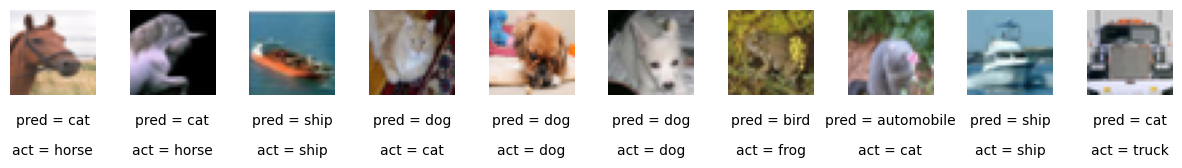

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)